Cargar librerias

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Obtenr archivo y convertir en DataFrame

In [14]:
archivo= r'C:\Users\computadora\Desktop\dat set proyecto final vzla\data_latinoamerica\Tablas_paises\ampliado_Modelado.xlsx'

In [15]:
tabla_gral_df = pd.read_excel(archivo)
tabla_gral_df

,Fecha,id_Pais,PIB_anual,PIB_per_capita,IDH,Esperanza_de_vida,Muertes,Tasa_mortalidad,Migrantes,Población,Tasa_Migracion
0,2001,ARG,300421,8085,0.784,74.19,280491,7.55,-22787,37156000,-0.613279
1,2000,ARG,317759,8639,0.779,73.93,279558,7.60,-22770,36784000,-0.619019
2,2002,ARG,112458,2998,0.785,74.41,282045,7.52,-22668,37516000,-0.604222
3,2003,ARG,142431,3761,0.793,74.08,29781,7.86,-22353,37870000,-0.590256
4,2004,ARG,164911,4314,0.798,74.86,28593,7.48,-22336,38226000,-0.584314
...,...,...,...,...,...,...,...,...,...,...,...
536,1994,VEN,58357,2742,0.675,71.64,102584,4.82,-567,21283000,-0.026641
537,1993,VEN,59865,2876,0.676,71.51,98767,4.75,-487,20815000,-0.023397
538,1992,VEN,60400,2968,0.675,71.31,96465,4.74,-388,20347000,-0.019069
539,1991,VEN,53382,2685,0.669,71.12,93193,4.69,-241,19879000,-0.012123


Analisis Exploratorio y Limpieza de datos

In [16]:
tabla_gral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha              541 non-null    int64  
 1   id_Pais            541 non-null    object 
 2   PIB_anual          541 non-null    object 
 3   PIB_per_capita     541 non-null    int64  
 4   IDH                541 non-null    float64
 5   Esperanza_de_vida  541 non-null    float64
 6   Muertes            541 non-null    int64  
 7   Tasa_mortalidad    541 non-null    float64
 8   Migrantes          541 non-null    int64  
 9   Población          541 non-null    int64  
 10  Tasa_Migracion     541 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 46.6+ KB


In [17]:
tabla_gral_df.columns

Index(['Fecha', 'id_Pais', 'PIB_anual', 'PIB_per_capita', 'IDH',
       'Esperanza_de_vida', 'Muertes', 'Tasa_mortalidad', 'Migrantes',
       'Población', 'Tasa_Migracion'],
      dtype='object')

In [18]:
tabla_gral_df['PIB_anual'] = pd.to_numeric(tabla_gral_df['PIB_anual'], errors='coerce')

Valores nulos

In [19]:
tabla_gral_df.isna().sum()

Fecha                 0
id_Pais               0
PIB_anual            32
PIB_per_capita        0
IDH                   0
Esperanza_de_vida     0
Muertes               0
Tasa_mortalidad       0
Migrantes             0
Población             0
Tasa_Migracion        0
dtype: int64

In [20]:
# Esopacios en blancos en los datos del df
tabla_gral_df = tabla_gral_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [21]:
tabla_gral_df

,Fecha,id_Pais,PIB_anual,PIB_per_capita,IDH,Esperanza_de_vida,Muertes,Tasa_mortalidad,Migrantes,Población,Tasa_Migracion
0,2001,ARG,300421.0,8085,0.784,74.19,280491,7.55,-22787,37156000,-0.613279
1,2000,ARG,317759.0,8639,0.779,73.93,279558,7.60,-22770,36784000,-0.619019
2,2002,ARG,112458.0,2998,0.785,74.41,282045,7.52,-22668,37516000,-0.604222
3,2003,ARG,142431.0,3761,0.793,74.08,29781,7.86,-22353,37870000,-0.590256
4,2004,ARG,164911.0,4314,0.798,74.86,28593,7.48,-22336,38226000,-0.584314
...,...,...,...,...,...,...,...,...,...,...,...
536,1994,VEN,58357.0,2742,0.675,71.64,102584,4.82,-567,21283000,-0.026641
537,1993,VEN,59865.0,2876,0.676,71.51,98767,4.75,-487,20815000,-0.023397
538,1992,VEN,60400.0,2968,0.675,71.31,96465,4.74,-388,20347000,-0.019069
539,1991,VEN,53382.0,2685,0.669,71.12,93193,4.69,-241,19879000,-0.012123


In [22]:
df = tabla_gral_df

In [23]:
import warnings

# Desactivar todas las advertencias de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
pais = df['id_Pais'].unique().tolist()
pais

['ARG',
 'BOL',
 'BRA',
 'CHI',
 'COL',
 'COS',
 'ECU',
 'GUA',
 'HON',
 'MEX',
 'NIC',
 'PAN',
 'PAR',
 'PER',
 'SAL',
 'URU',
 'VEN']

c:\Users\computadora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\computadora\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


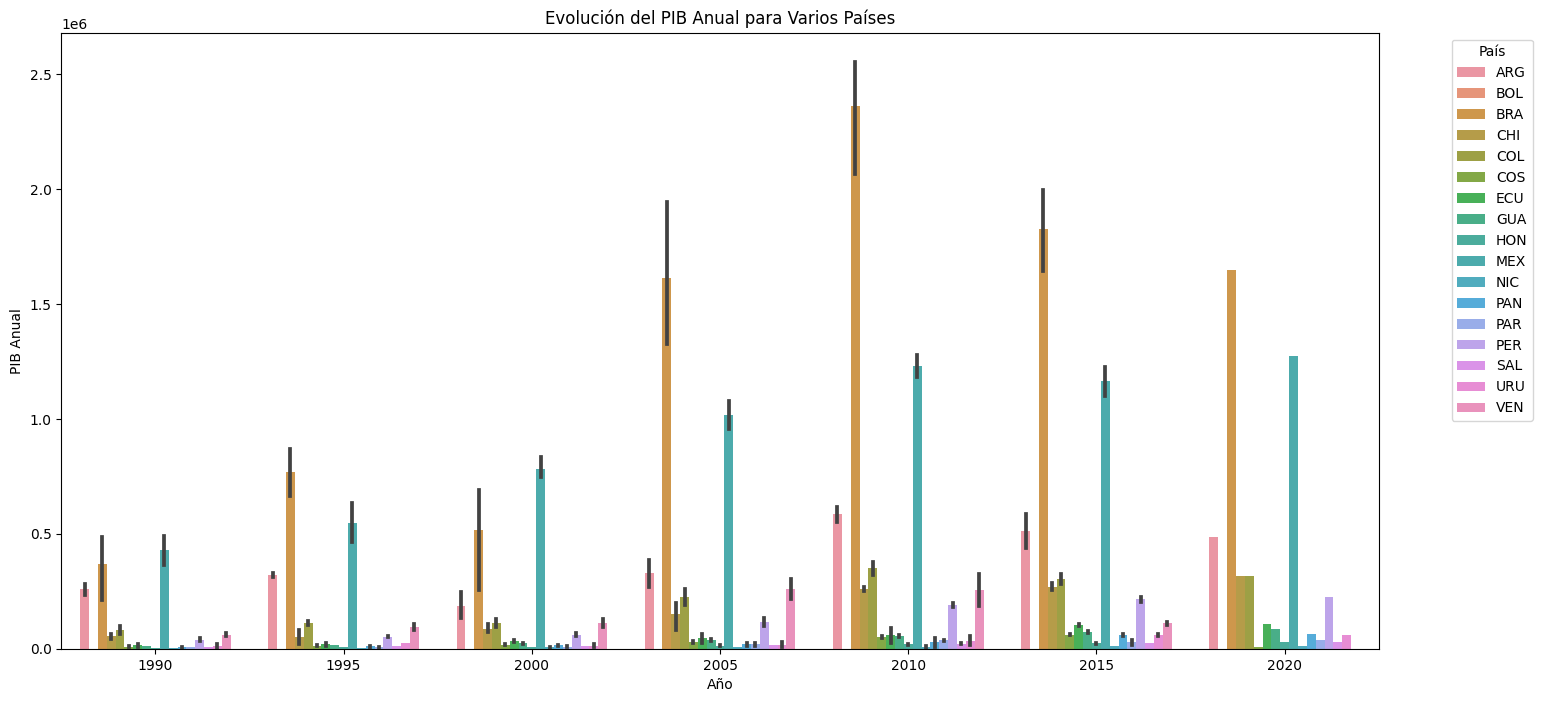

In [25]:
# Graficar la evolución del PIB Anual para cada país (gráfico de barras)
# Crear una nueva columna 'Quinquenio' basada en la columna 'Fecha'
df['Quinquenio'] = pd.cut(df['Fecha'], bins=range(1990, 2026, 5), labels=range(1990, 2025, 5))


plt.figure(figsize=(17, 8))
sns.barplot(x='Quinquenio', y='PIB_anual', hue='id_Pais', data=df)
plt.title('Evolución del PIB Anual para Varios Países')
plt.xlabel('Año')
plt.ylabel('PIB Anual')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


c:\Users\computadora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

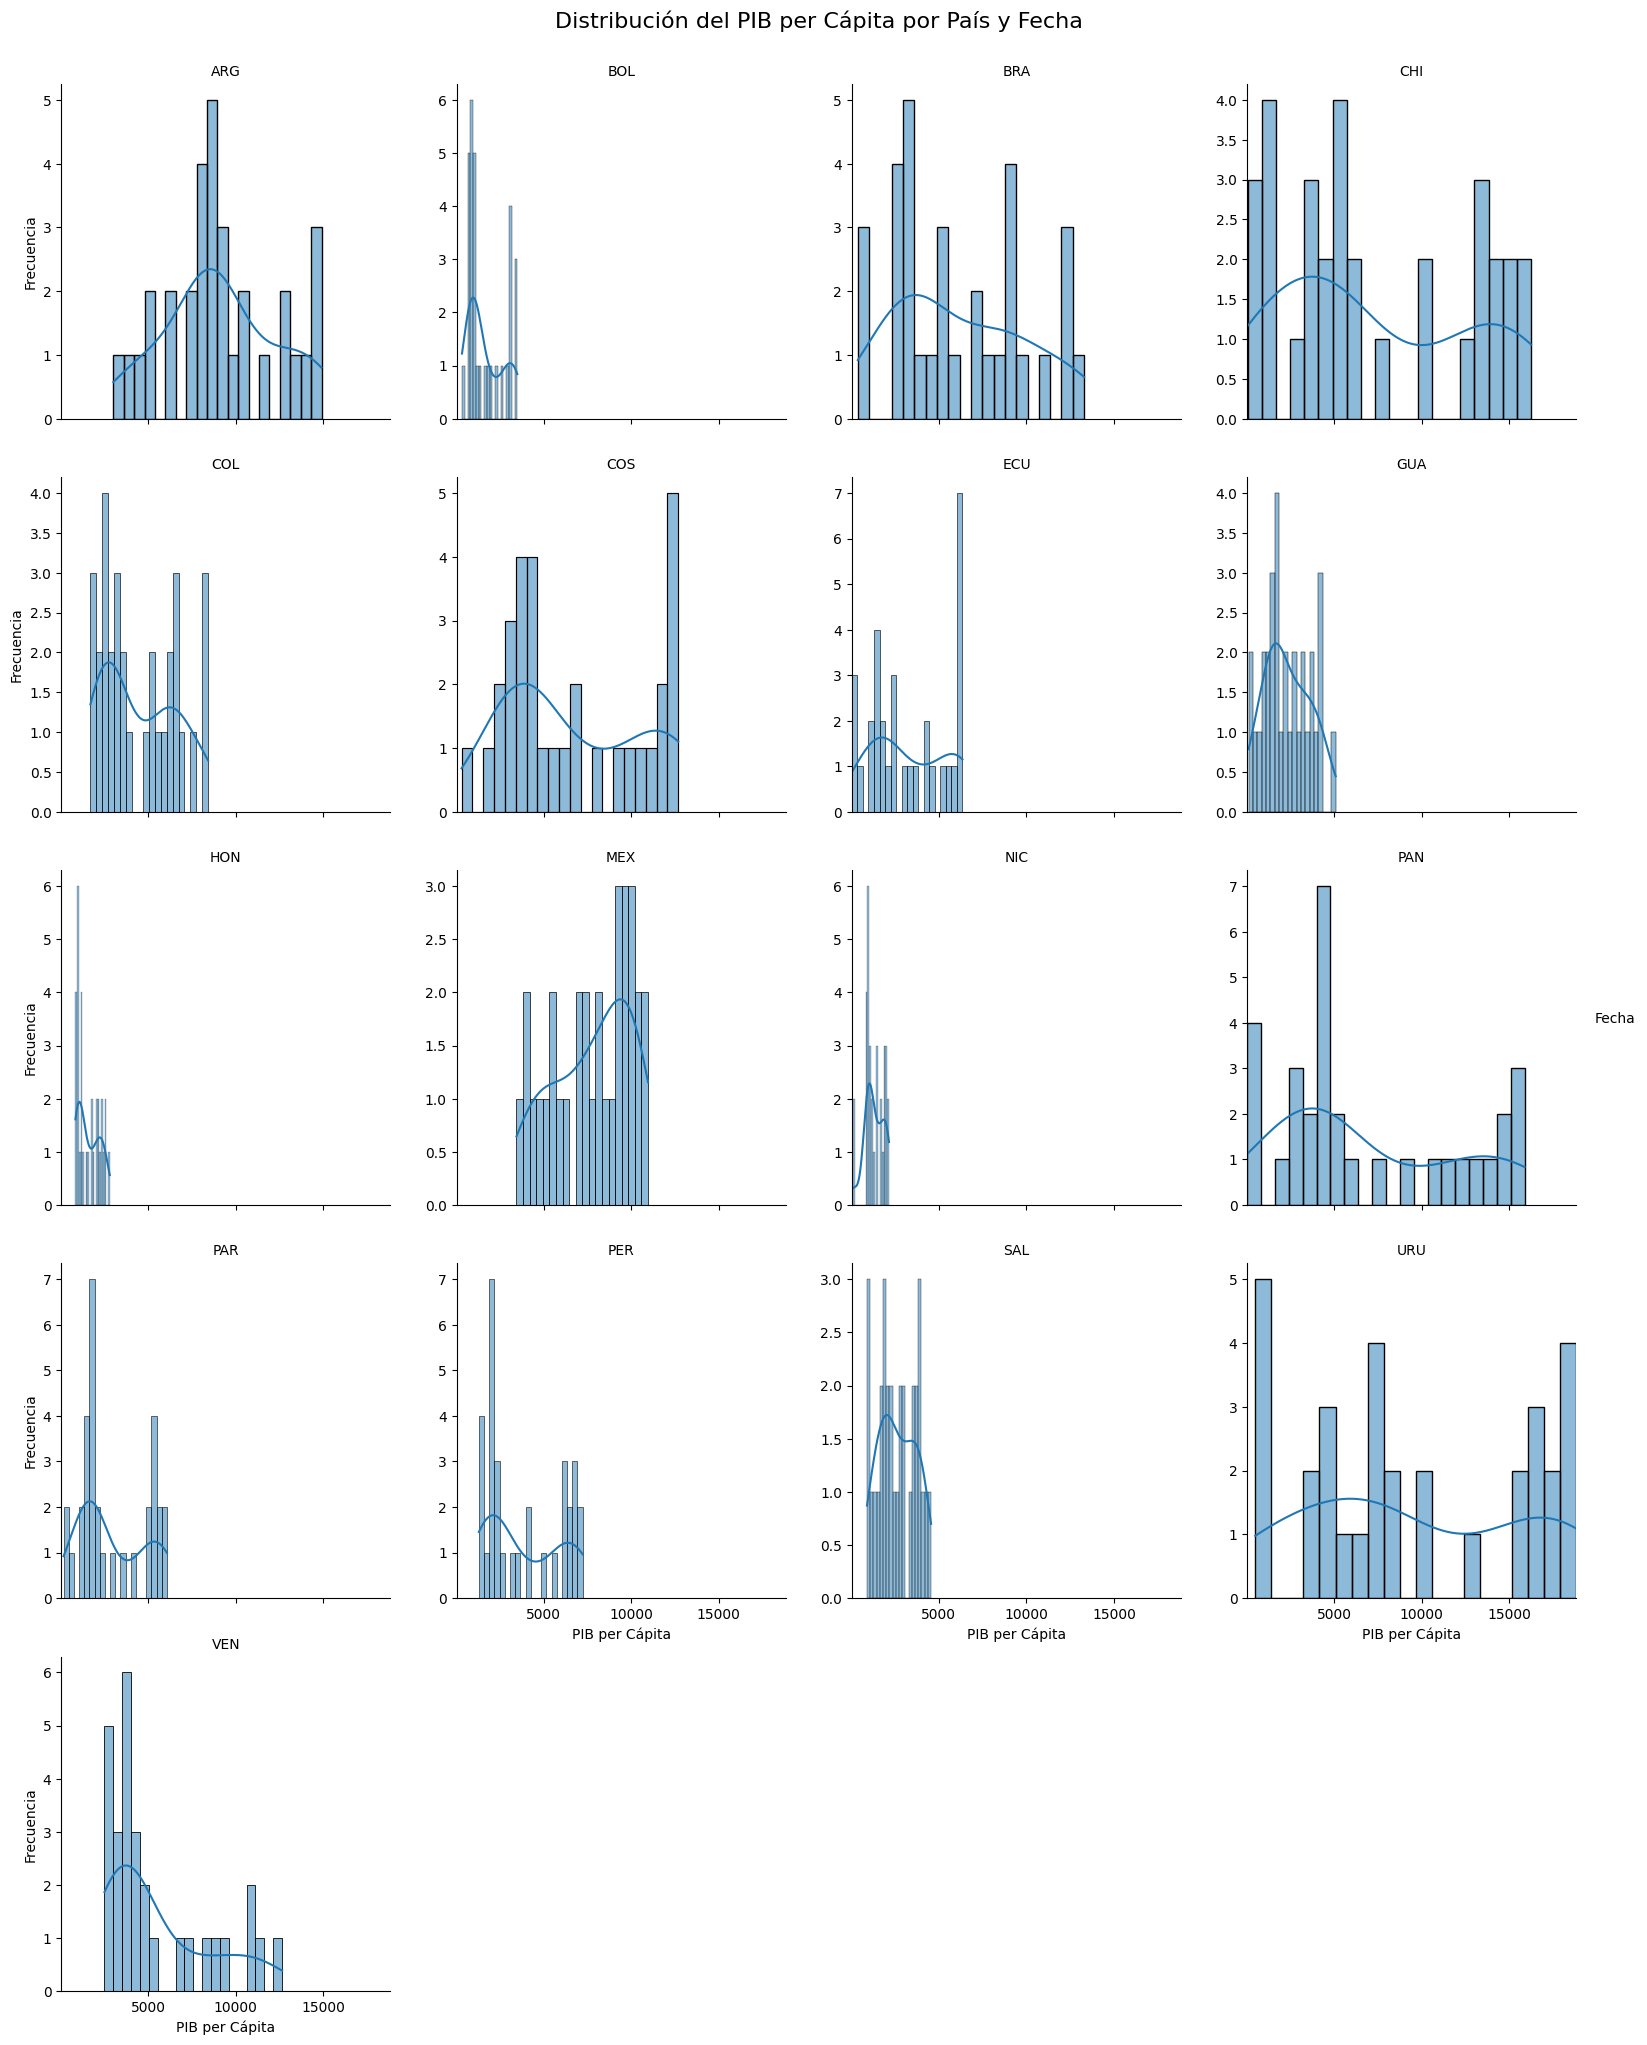

In [28]:
# Histograma para la distribución del PIB per cápita

plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col='id_Pais', col_wrap=4, height=4, sharey=False)
g.map(sns.histplot, 'PIB_per_capita', bins=20, kde=True)
g.set_axis_labels('PIB per Cápita', 'Frecuencia')
g.set_titles(col_template='{col_name}')
g.set(xlim=(df['PIB_per_capita'].min(), df['PIB_per_capita'].max()))  # Ajusta el rango del eje x para todos los subgráficos
g.add_legend(title='Fecha')
plt.suptitle('Distribución del PIB per Cápita por País y Fecha', y=1.02, fontsize=16)
plt.show()

# Resumen Analítico: El histograma proporciona información sobre la distribución del PIB
# per cápita en los países. 
# Puede ayudar a identificar la concentración de países en ciertos rangos de PIB per cápita.


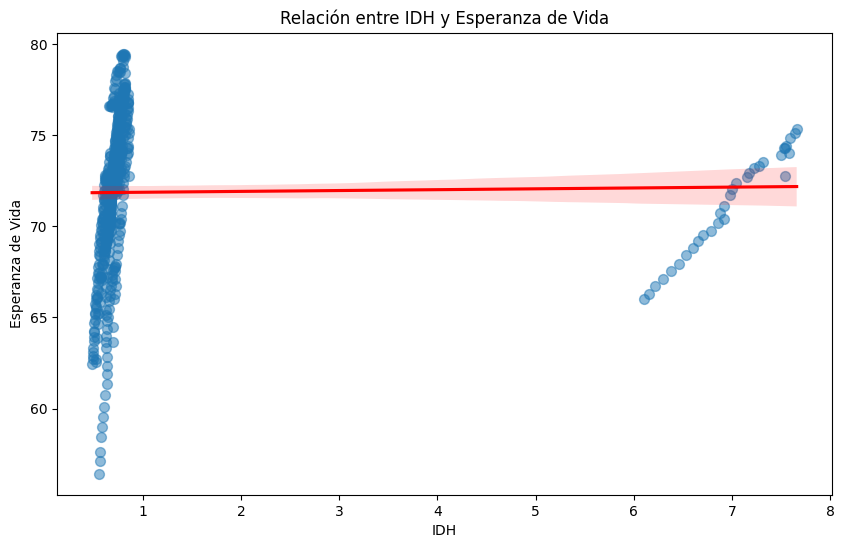

In [29]:

# Gráfico de dispersión para la relación entre el IDH y la Esperanza de Vida

plt.figure(figsize=(10, 6))
sns.regplot(x='IDH', y='Esperanza_de_vida', data=df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relación entre IDH y Esperanza de Vida')
plt.xlabel('IDH')
plt.ylabel('Esperanza de Vida')
plt.show()

# Resumen Analítico: Este gráfico de dispersión muestra la relación entre el Índice de Desarrollo Humano (IDH) y 
# la esperanza de vida en diferentes países. Puede ayudar a identificar patrones y posibles correlaciones.


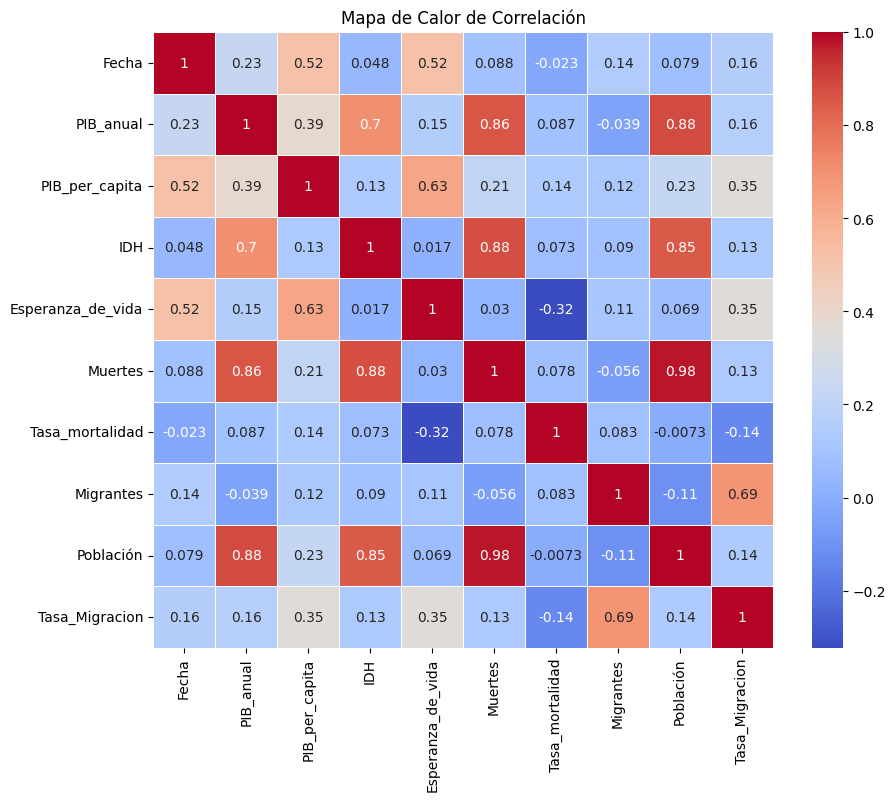

In [30]:
# Mapa de calor para visualizar la correlación entre todas las variables numéricas

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

# Resumen Analítico: El mapa de calor resalta las correlaciones entre las variables numéricas. 
# Puede ayudar a identificar
# relaciones fuertes o débiles entre las diferentes variables del conjunto de datos.
